In [1]:
!pip install tensorflow==2.10

import tensorflow
print(tensorflow.__version__)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
2.10.0


In [2]:
# Mounted drive to this network. 
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [17]:
data_path1='drive/Shared with me/Data_Images/' # didn't work
data_path3='drive/My Drive/Colab Notebooks/RealFake/RealFake2/'
data_path4='drive/My Drive/Colab Notebooks/RealFake/RealFake/'
data_path2='drive/My Drive/Colab Notebooks/Data_Images2/' #no need

In [4]:
real_path = data_path3+'real/'
fake_path = data_path3+'fake/'

In [6]:
# import os
# import cv2
# import imghdr
# import fnmatch
# import shutil

# # Creating real, fake subfolders in a 'RealFake' directory
# # (ONLY RUN IF YOU DON"T HAVE THE subfolders yet)
# for filename in os.listdir(data_path2):
#   source=data_path2+filename

#   if fnmatch.fnmatch(filename, '*_0.png'):
#     dest_real=real_path+filename
#     shutil.move(source, dest_real)

#   if fnmatch.fnmatch(filename, '*_1.png'):
#     dest_fake=fake_path+filename
#     shutil.move(source, dest_fake)

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [68]:
# Creating the dataset
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Rescaling, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam

# Image Parameters
n_classes=2
img_height=256
img_width=256
channels=3
batch_size=5

data = tf.keras.utils.image_dataset_from_directory(
    data_path3,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=batch_size,
    image_size=(img_height, img_width),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

seed=200
# Training Dataset (80% of the Dataset)
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_path3,
  validation_split=0.2,
  subset="training",
  seed=seed,
  image_size=(img_height,img_width),
  batch_size=batch_size)

# Validation Dataset  (20% of the Dataset)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_path3,
  validation_split=0.2,
  subset="validation",
  seed=seed,
  image_size=(img_height,img_width),
  batch_size=batch_size)


class_names = train_ds.class_names
print(class_names)

Found 2041 files belonging to 2 classes.
Found 2041 files belonging to 2 classes.
Using 1633 files for training.
Found 2041 files belonging to 2 classes.
Using 408 files for validation.
['fake', 'real']


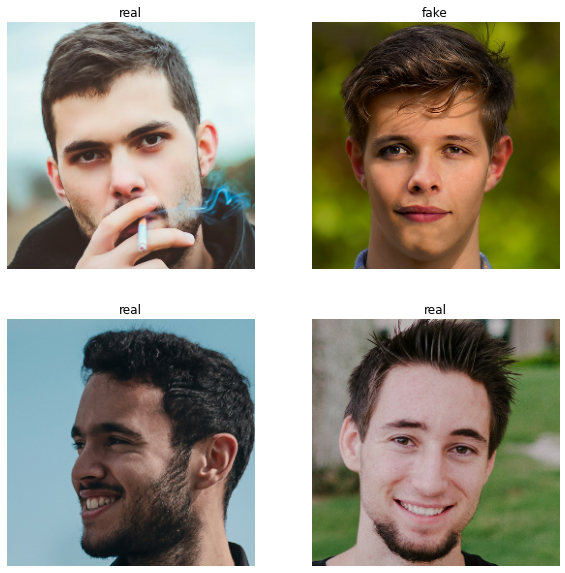

In [69]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [70]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [71]:
import tensorflow
print(tensorflow.__version__)

2.10.0


In [72]:
# Load the pre-trained VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Add new layers for binary classification on top of the pre-trained model
num_classes = len(class_names)

model = Sequential()
model.add(Rescaling(1./255, input_shape=(img_height, img_width,3)))
model.add(vgg16_model)
model.add(GlobalAveragePooling2D()),
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
# model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
# model.summary()

# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential

model.compile(optimizer=Adam(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy']
             )

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_5 (Dropout)         (None, 512)              

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [73]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
327/327 [==============================] - 11s 21ms/step - loss: 0.7549 - accuracy: 0.5003 - val_loss: 2.5874 - val_accuracy: 0.5147
Epoch 2/15
327/327 [==============================] - 6s 19ms/step - loss: 0.7232 - accuracy: 0.5273 - val_loss: 1.0384 - val_accuracy: 0.5147
Epoch 3/15
327/327 [==============================] - 6s 20ms/step - loss: 0.7269 - accuracy: 0.5052 - val_loss: 0.7219 - val_accuracy: 0.4853
Epoch 4/15
327/327 [==============================] - 6s 20ms/step - loss: 0.7182 - accuracy: 0.5181 - val_loss: 0.7080 - val_accuracy: 0.4853
Epoch 5/15
327/327 [==============================] - 6s 20ms/step - loss: 0.7270 - accuracy: 0.4985 - val_loss: 0.9492 - val_accuracy: 0.5147
Epoch 6/15
327/327 [==============================] - 6s 19ms/step - loss: 0.7302 - accuracy: 0.5089 - val_loss: 1.1701 - val_accuracy: 0.4853
Epoch 7/15
327/327 [==============================] - 6s 20ms/step - loss: 0.7326 - accuracy: 0.4881 - val_loss: 0.7052 - val_accuracy: 0.507

In [75]:
model.save(data_path3+"test3.h5")

In [76]:
# Testing the model with images from Dall-E
import numpy as np
from tensorflow import keras
from keras.preprocessing import image
from keras.models import load_model

reload_model=keras.models.load_model(data_path3+'test3.h5')
reload_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 256, 256, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_17 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization (BatchN  (None, 512)              2048      
 ormalization)                                                   
                                                                 
 dropout_5 (Dropout)         (None, 512)              

In [94]:
# load the image and convert it to the required format
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from PIL import Image

input_size=(256,256)

def test_model(img):
  test_image = load_img(img)
  test_image=test_image.resize(input_size)
  test_image = img_to_array(test_image)
  test_image = np.expand_dims(test_image, axis=0)

  # make the prediction
  result = reload_model.predict(test_image)
  # predicted_class = np.argmax(result)

  if (np.round(result,1)<=0.5):
    verdict="Real Image"
  else:
    verdict="Fake Image"

  return print("Image Predicted Value: ", result, "\nVerdict: ", verdict) 

In [95]:
test1=data_path4+'donald.png' # real donald trump
test2=data_path4+'donaldrealfake.jpg' #generated donald trump
# test3=fake_path+'Image2673_1.png' #fake from training images
# test4=real_path+'Image2700_0.png' #real from training images

test3=fake_path+'mid_474_1110.jpg' #fake from training images
test4=real_path+'real_01081.jpg' #real from training images

In [96]:
print("\nInput: Real Donald")
test_model(test1)

print("\nInput: Fake Donald")
test_model(test2)

print("\nInput: Fake Training")
test_model(test3)

print("\nInput: Real Training")
test_model(test4)


Input: Real Donald
1/1 [==============================] - 0s 27ms/step
Image Predicted Value:  [[0.48167747]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 24ms/step
Image Predicted Value:  [[0.29832807]] 
Verdict:  Real Image

Input: Fake Training
1/1 [==============================] - 0s 25ms/step
Image Predicted Value:  [[0.5647705]] 
Verdict:  Fake Image

Input: Real Training
1/1 [==============================] - 0s 25ms/step
Image Predicted Value:  [[0.39231712]] 
Verdict:  Real Image


In [98]:
test5=data_path4+'donald.png' # real donald trump
test6=data_path4+'donaldfake2.png' #generated donald trump
test7=data_path4+'donaldfake3.png' #generated donald trump
test8=data_path4+'donaldfake4.png' #generated donald trump

print("\nInput: Real Donald")
test_model(test5)

print("\nInput: Fake Donald")
test_model(test6)

print("\nInput: Fake Donald")
test_model(test7)

print("\nInput: Fake Donald")
test_model(test8)


Input: Real Donald
1/1 [==============================] - 0s 28ms/step
Image Predicted Value:  [[0.48167747]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 24ms/step
Image Predicted Value:  [[0.40656465]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 24ms/step
Image Predicted Value:  [[0.4136511]] 
Verdict:  Real Image

Input: Fake Donald
1/1 [==============================] - 0s 27ms/step
Image Predicted Value:  [[0.33301935]] 
Verdict:  Real Image


In [102]:
test8=fake_path+'mid_446_0011.jpg' #fake from training images
test9=real_path+'real_01078.jpg' #real from training images
test10=fake_path+'mid_469_1111.jpg' #fake from training images
test11=real_path+'real_01068.jpg' #real from training images

print("\nInput: Fake Training")
test_model(test8)

print("\nInput: Real Training")
test_model(test9)

print("\nInput: Fake Training")
test_model(test10)

print("\nInput: Real Training")
test_model(test11)


Input: Fake Training
1/1 [==============================] - 0s 26ms/step
Image Predicted Value:  [[0.6675455]] 
Verdict:  Fake Image

Input: Real Training
1/1 [==============================] - 0s 25ms/step
Image Predicted Value:  [[0.17085926]] 
Verdict:  Real Image

Input: Fake Training
1/1 [==============================] - 0s 24ms/step
Image Predicted Value:  [[0.46692935]] 
Verdict:  Real Image

Input: Real Training
1/1 [==============================] - 0s 25ms/step
Image Predicted Value:  [[0.59532076]] 
Verdict:  Fake Image
